# Research Question

## How does the prevalence of asthma and Chronic Obstructive Pulmonary Disease (COPD) vary by state in the United States, and are there any significant geographic patterns or disparities?

# Problem Statement

The prevalence of asthma and Chronic Obstructive Pulmonary Disease (COPD) presents significant public health concerns in the United States, with variations observed across different states. Understanding the geographic disparities in these respiratory conditions can provide insights into environmental, socioeconomic, and healthcare access factors that contribute to their prevalence. Given the increasing burden of respiratory diseases on health systems, it is essential to identify patterns that could inform targeted interventions and policy changes. This analysis hypothesizes that certain states will exhibit higher rates of asthma and COPD due to factors such as air quality, socioeconomic status, and access to healthcare services.

# Data Description:

United States Chronic Disease Indicators (CDI)
Last Updated: March 9, 2024
Source: CDC's Division of Population Health

The U.S. Chronic Disease Indicators dataset provides a set of 115 public health indicators developed through a collaborative effort involving the CDC, the Council of State and Territorial Epidemiologists, and the National Association of Chronic Disease Directors. These indicators enable consistent collection, reporting, and analysis of chronic disease data at the state and territorial levels. The dataset is designed to support public health practice, offering state-specific data while serving as a gateway to additional health-related data and resources.

The dataset is publicly accessible and available in multiple formats, including CSV, RDF, JSON, and XML, and I'll be accessing the CSV dataset that's available.

# Code
## Examine the dataset
Describe Methodology. Load the Dataset, check the data types, see the missing values, drop the columns are empty, make an analysis of the data
### Import libraries

In [58]:
# Import the libraries
import numpy as np                  # Numerical Python
import pandas as pd                 # Data Analysis
import matplotlib.pyplot as plt     # Plotting
import seaborn as sns               # Statistical Data Visualization

# Let's make sure pandas returns all the rows and columns for the dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Force pandas to display full numbers instead of scientific notation
#pd.options.display.float_format = '{:.0f}'.format

# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

## Read the dataset

In [60]:
# Read the dataset
df = pd.read_csv('U.S._Chronic_Disease_Indicators.csv')

## Understanding the dataset

In [62]:
# Checking first elements of the DataFrame with `.head( )` method
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DataValueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,Geolocation,LocationID,TopicID,QuestionID,ResponseID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2015,2019,US,United States,US Cancer DVT,Cancer,"Breast cancer mortality among all females, und...",NaN,Number,Number,3009.0,3009.0,NaN,NaN,NaN,NaN,Race/Ethnicity,Hispanic,NaN,NaN,NaN,NaN,NaN,59,CAN,CAN02,NaN,NMBR,RACE,HIS,NaN,NaN,NaN,NaN
1,2019,2019,GU,Guam,BRFSS,Diabetes,Diabetes among adults,NaN,%,Crude Prevalence,19.3,19.3,NaN,NaN,15.8,23.5,Age,Age 45-64,NaN,NaN,NaN,NaN,POINT (144.793731 13.444304),66,DIA,DIA01,NaN,CRDPREV,AGE,AGE4564,NaN,NaN,NaN,NaN
2,2019,2019,ID,Idaho,BRFSS,Diabetes,Diabetes among adults,NaN,%,Crude Prevalence,10.6,10.6,NaN,NaN,9.1,12.2,Sex,Male,NaN,NaN,NaN,NaN,POINT (-114.3637300419997 43.682630005000476),16,DIA,DIA01,NaN,CRDPREV,SEX,SEXM,NaN,NaN,NaN,NaN
3,2019,2019,MD,Maryland,BRFSS,Mental Health,Depression among adults,NaN,%,Crude Prevalence,12.1,12.1,NaN,NaN,11.0,13.3,Sex,Male,NaN,NaN,NaN,NaN,POINT (-76.60926011099963 39.29058096400047),24,MEN,MEN02,NaN,CRDPREV,SEX,SEXM,NaN,NaN,NaN,NaN
4,2019,2019,MI,Michigan,NVSS,Health Status,Life expectancy at birth,NaN,Years,Number,78.0,78.0,NaN,NaN,77.9,78.1,Overall,Overall,NaN,NaN,NaN,NaN,POINT (-84.71439026999968 44.6613195430005),26,HEA,HEA06,NaN,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN


In [63]:
# Checking last elements of the DataFrame with `.tail( )` method
df.tail()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DataValueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,Geolocation,LocationID,TopicID,QuestionID,ResponseID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
310475,2022,2022,VA,Virginia,BRFSS,Mental Health,Frequent mental distress among adults,NaN,%,Age-adjusted Prevalence,17.1,17.1,NaN,NaN,16.0,18.3,Overall,Overall,NaN,NaN,NaN,NaN,POINT (-78.45789046299967 37.54268067400045),51,MEN,MEN05,NaN,AGEADJPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
310476,2022,2022,WA,Washington,BRFSS,Social Determinants of Health,Lack of health insurance among adults aged 18-...,NaN,%,Age-adjusted Prevalence,30.4,30.4,NaN,NaN,27.8,33.1,Race/Ethnicity,Hispanic,NaN,NaN,NaN,NaN,POINT (-120.47001078999972 47.52227862900048),53,SDOH,SDH09,NaN,AGEADJPREV,RACE,HIS,NaN,NaN,NaN,NaN
310477,2022,2022,UT,Utah,BRFSS,Health Status,Frequent physical distress among adults,NaN,%,Age-adjusted Prevalence,NaN,NaN,****,Data suppressed; denominator < 50 or relative ...,NaN,NaN,Race/Ethnicity,"Hawaiian or Pacific Islander, non-Hispanic",NaN,NaN,NaN,NaN,POINT (-111.58713063499971 39.360700171000474),49,HEA,HEA03,NaN,AGEADJPREV,RACE,HAPI,NaN,NaN,NaN,NaN
310478,2022,2022,VI,Virgin Islands,BRFSS,Immunization,Pneumococcal vaccination among adults aged 65 ...,NaN,%,Age-adjusted Prevalence,44.3,44.3,NaN,NaN,32.2,57.0,Race/Ethnicity,"Black, non-Hispanic",NaN,NaN,NaN,NaN,POINT (-64.896335 18.335765),78,IMM,IMM04,NaN,AGEADJPREV,RACE,BLK,NaN,NaN,NaN,NaN
310479,2022,2022,WI,Wisconsin,BRFSS,Immunization,Influenza vaccination among adults 18â€“64 who...,NaN,%,Crude Prevalence,NaN,NaN,****,Data suppressed; denominator < 50 or relative ...,NaN,NaN,Race/Ethnicity,"Hawaiian or Pacific Islander, non-Hispanic",NaN,NaN,NaN,NaN,POINT (-89.81637074199966 44.39319117400049),55,IMM,IMM02,NaN,CRDPREV,RACE,HAPI,NaN,NaN,NaN,NaN


In [64]:
# display the dimensions of the data
# This is the number of rows and columns in the data
# Syntax: DataFrame.shape
df.shape

(310480, 34)

In [65]:
# Let's check the basic information about the dataset
# Syntax: DataFrame.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310480 entries, 0 to 310479
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  310480 non-null  int64  
 1   YearEnd                    310480 non-null  int64  
 2   LocationAbbr               310480 non-null  object 
 3   LocationDesc               310480 non-null  object 
 4   DataSource                 310480 non-null  object 
 5   Topic                      310480 non-null  object 
 6   Question                   310480 non-null  object 
 7   Response                   0 non-null       float64
 8   DataValueUnit              310480 non-null  object 
 9   DataValueType              310480 non-null  object 
 10  DataValue                  209826 non-null  float64
 11  DataValueAlt               209826 non-null  float64
 12  DataValueFootnoteSymbol    102351 non-null  object 
 13  DataValueFootnote          10

In [66]:
#create a function that removes empty columns, and tells us the columns that were empty and removed
def empty_columns(DataFrame):
    for column in DataFrame.columns:
        if len(DataFrame[column].dropna()) == 0:
            #column has only empty rows, so we don't need this column
            DataFrame.drop(columns=[column], inplace=True)
            print(str(column)+ ' was dropped from dataframe because column has only empty rows')
    print("There are " + str(len(DataFrame.columns))+ " to after dropping empty columns")
    return

empty_columns(df)

Response was dropped from dataframe because column has only empty rows
StratificationCategory2 was dropped from dataframe because column has only empty rows
Stratification2 was dropped from dataframe because column has only empty rows
StratificationCategory3 was dropped from dataframe because column has only empty rows
Stratification3 was dropped from dataframe because column has only empty rows
ResponseID was dropped from dataframe because column has only empty rows
StratificationCategoryID2 was dropped from dataframe because column has only empty rows
StratificationID2 was dropped from dataframe because column has only empty rows
StratificationCategoryID3 was dropped from dataframe because column has only empty rows
StratificationID3 was dropped from dataframe because column has only empty rows
There are 24 to after dropping empty columns


In [67]:
#Drop more unnecessary columns
df.drop(columns=['DataValueAlt', 'DataValueFootnoteSymbol', 'DataValueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit'],inplace=True)


In [68]:
# Filter for only 'Asthma' and 'Chronic Obstructive Pulmonary Disease' topics
df_filtered_asthma = df[df['Topic'].isin(['Asthma'])]

In [69]:
# Filter for only 'Asthma' and 'Chronic Obstructive Pulmonary Disease' topics
df_filtered_copd = df[df['Topic'].isin(['Chronic Obstructive Pulmonary Disease'])]

In [70]:
# Let's create a function to determine the percentage of missing values
# Typically less than five percent missing values may not affect the results
# More than 5% can be dropped, replaced with existing data, or imputed using mean or median.
# Syntax: def missing(DataFrame):
#    print ('Percentage of missing values in the dataset:\n',
#           round((DataFrame.isnull().sum() * 100/ len(DataFrame)),2).sort_values(ascending=False))

def missing(DataFrame):
    print ('Percentage of missing values in the dataset:\n',
           round((DataFrame.isnull().sum() * 100/ len(DataFrame)),2).sort_values(ascending=False))


# Call the function and execute
# Syntax: missing(DataFrame)
missing(df_filtered_asthma)

Percentage of missing values in the dataset:
 DataValue                    50.23
Geolocation                   1.87
StratificationCategory1       0.00
StratificationCategoryID1     0.00
DataValueTypeID               0.00
QuestionID                    0.00
TopicID                       0.00
LocationID                    0.00
Stratification1               0.00
YearStart                     0.00
YearEnd                       0.00
DataValueType                 0.00
DataValueUnit                 0.00
Question                      0.00
Topic                         0.00
DataSource                    0.00
LocationDesc                  0.00
LocationAbbr                  0.00
StratificationID1             0.00
dtype: float64


In [71]:
missing(df_filtered_copd)

Percentage of missing values in the dataset:
 DataValue                    32.78
Geolocation                   1.89
StratificationCategory1       0.00
StratificationCategoryID1     0.00
DataValueTypeID               0.00
QuestionID                    0.00
TopicID                       0.00
LocationID                    0.00
Stratification1               0.00
YearStart                     0.00
YearEnd                       0.00
DataValueType                 0.00
DataValueUnit                 0.00
Question                      0.00
Topic                         0.00
DataSource                    0.00
LocationDesc                  0.00
LocationAbbr                  0.00
StratificationID1             0.00
dtype: float64


In [72]:
# Dropping rows with missing geolocation because less than 5% missing
df_filtered_asthma = df_filtered_asthma.dropna(subset=['Geolocation'])

# Filling missing DataValue by group (DataValueUnit and DataValueType) because more than 5% missing
df_filtered_asthma['DataValue'] = df_filtered_asthma.groupby(['DataValueUnit', 'DataValueType'])['DataValue'].transform(lambda x: x.fillna(x.mean()))

In [73]:
# check percentage of missing data
missing(df_filtered_asthma)

Percentage of missing values in the dataset:
 YearStart                    0.0
StratificationCategory1      0.0
StratificationCategoryID1    0.0
DataValueTypeID              0.0
QuestionID                   0.0
TopicID                      0.0
LocationID                   0.0
Geolocation                  0.0
Stratification1              0.0
DataValue                    0.0
YearEnd                      0.0
DataValueType                0.0
DataValueUnit                0.0
Question                     0.0
Topic                        0.0
DataSource                   0.0
LocationDesc                 0.0
LocationAbbr                 0.0
StratificationID1            0.0
dtype: float64


In [74]:
# Dropping rows with missing geolocation because less than 5% missing
df_filtered_copd = df_filtered_copd.dropna(subset=['Geolocation'])

# Filling missing DataValue by group (DataValueUnit and DataValueType) because more than 5% missing
df_filtered_copd['DataValue'] = df_filtered_copd.groupby(['DataValueUnit', 'DataValueType'])['DataValue'].transform(lambda x: x.fillna(x.mean()))

In [75]:
# check percentage of missing data
missing(df_filtered_copd)

Percentage of missing values in the dataset:
 YearStart                    0.0
StratificationCategory1      0.0
StratificationCategoryID1    0.0
DataValueTypeID              0.0
QuestionID                   0.0
TopicID                      0.0
LocationID                   0.0
Geolocation                  0.0
Stratification1              0.0
DataValue                    0.0
YearEnd                      0.0
DataValueType                0.0
DataValueUnit                0.0
Question                     0.0
Topic                        0.0
DataSource                   0.0
LocationDesc                 0.0
LocationAbbr                 0.0
StratificationID1            0.0
dtype: float64


In [76]:
# Group by state and calculate mean prevalence for each state and condition
df_grouped_ast = df_filtered_asthma.groupby(['LocationDesc', 'Topic'])['DataValue'].mean().reset_index()

In [77]:
# Group by state and calculate mean prevalence for each state and condition
df_grouped_copd = df_filtered_copd.groupby(['LocationDesc', 'Topic'])['DataValue'].mean().reset_index()

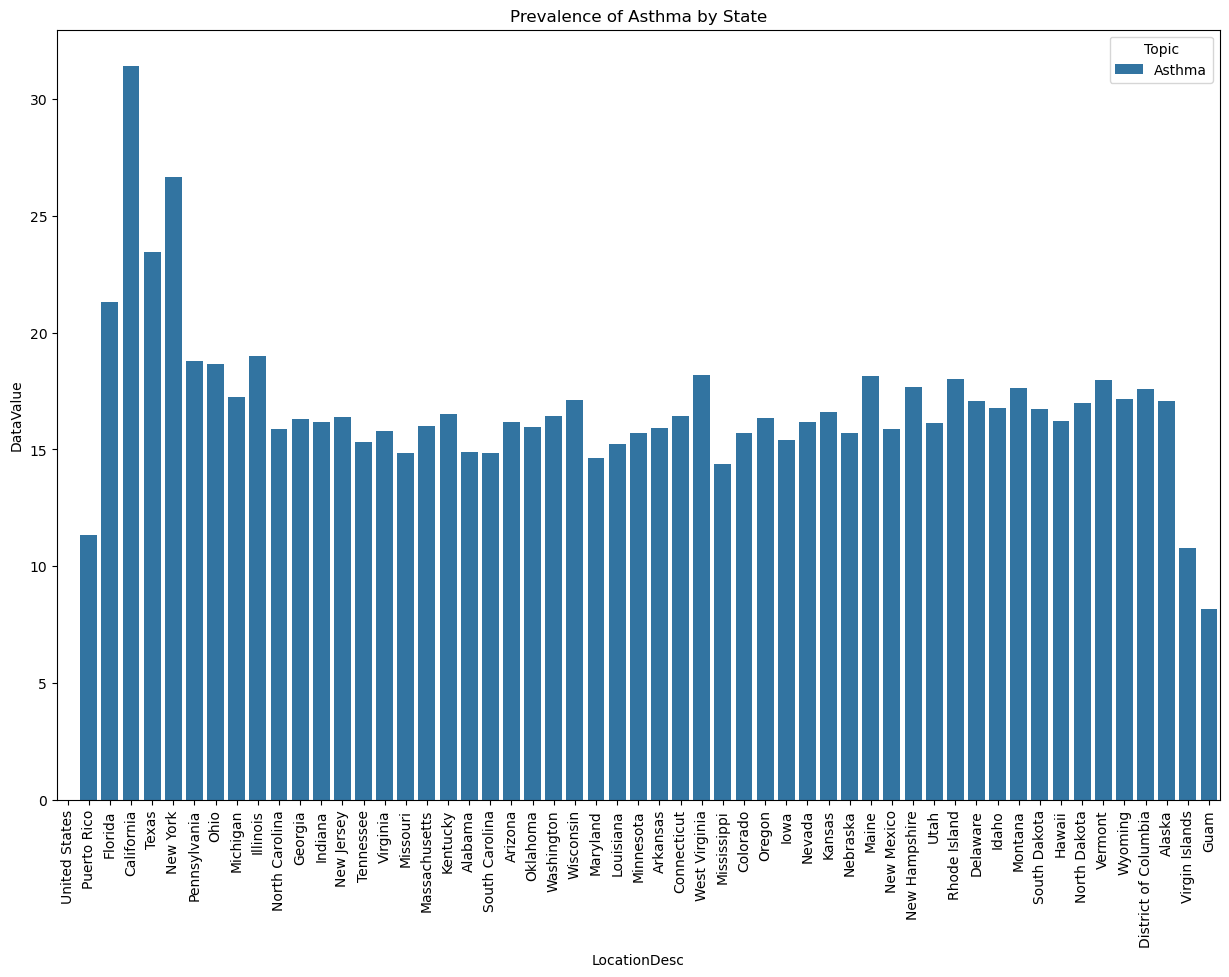

In [78]:
# Barplot to visualize the mean prevalence of asthma by state
plt.figure(figsize=(15, 10))

# Sort the data by 'Prevalence' in descending order
df_sorted_ast = df.sort_values('DataValue', ascending=False)

sns.barplot(x='LocationDesc', y='DataValue', hue='Topic', data=df_grouped_ast, order=df_sorted_ast['LocationDesc'])
plt.xticks(rotation=90)
plt.title('Prevalence of Asthma by State')
plt.show()

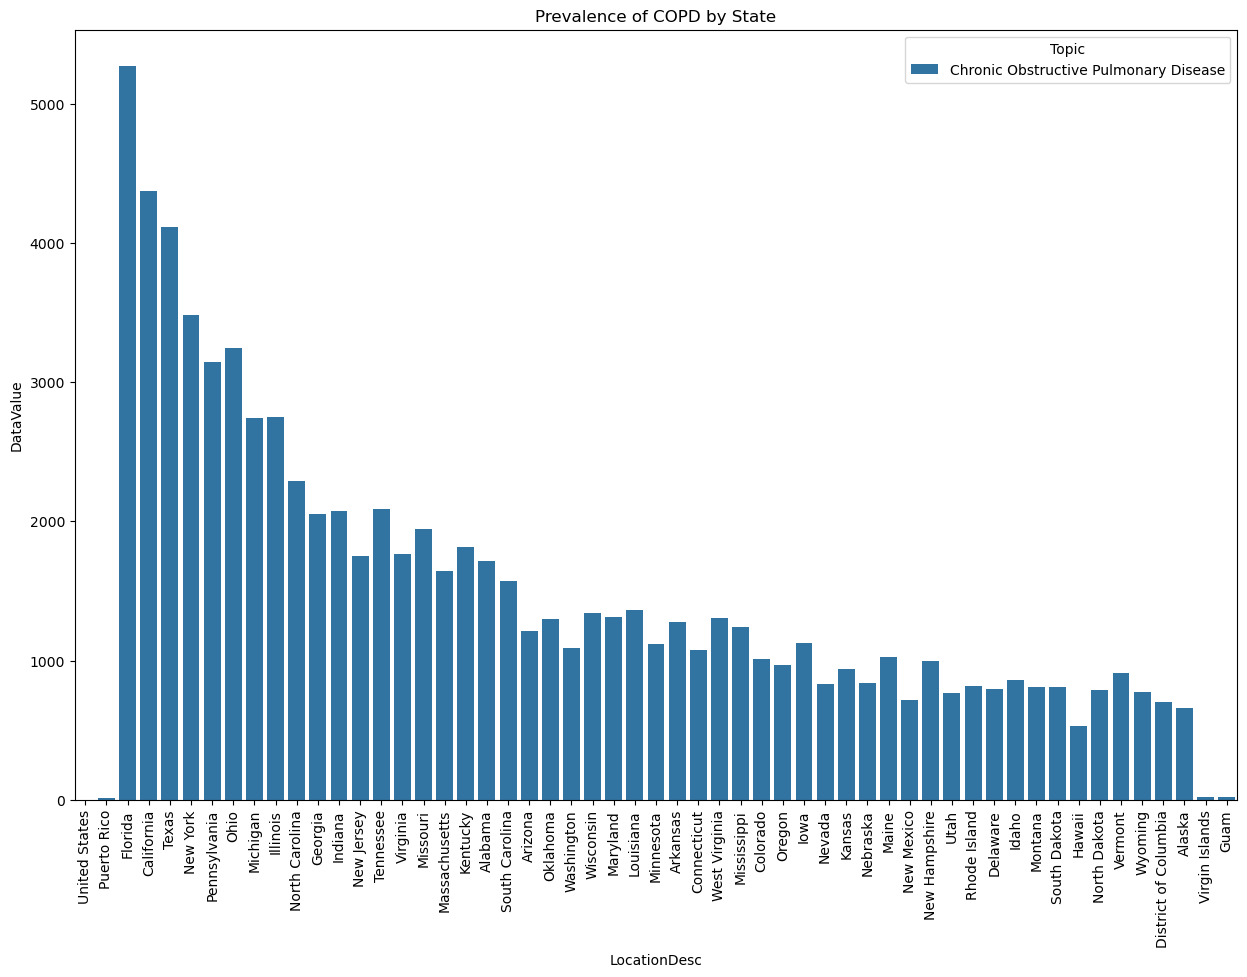

In [79]:
# Barplot to visualize the mean prevalence of COPD by state
plt.figure(figsize=(15, 10))

# Sort the data by 'Prevalence' in descending order
df_sorted = df.sort_values('DataValue', ascending=False)

sns.barplot(x='LocationDesc', y='DataValue', hue='Topic', data=df_grouped_copd, order=df_sorted['LocationDesc'])
plt.xticks(rotation=90)
plt.title('Prevalence of COPD by State')
plt.show()

## Observations of the Data Set
State the shape of the dataframe :
The dataframe features 310,480 rows and 34 columns.
There are a total of 10,556,320 data points expected in this dataset. There were 10 columns that were empty that were removed which were: Response was dropped from dataframe because column has only empty rows
StratificationCategory2 was dropped from dataframe because column has only empty rows
Stratification2 was dropped from dataframe because column has only empty rows
StratificationCategory3 was dropped from dataframe because column has only empty rows
Stratification3 was dropped from dataframe because column has only empty rows
ResponseID was dropped from dataframe because column has only empty rows
StratificationCategoryID2 was dropped from dataframe because column has only empty rows
StratificationID2 was dropped from dataframe because column has only empty rows
StratificationCategoryID3 was dropped from dataframe because column has only empty rows
StratificationID3 was dropped from dataframe because column has only empty rows

After dropping these and looking at the data some more I saw that there were more columns I didn't really need to do my investigations. So I removed those columns as well, then I split the dataframe in two, looking at asthma and COPD, and then I grouped them by the datavalue unit and type to get the averages and fill the null value and after doing so I created a table to take a look at the datavalues compared to the state and it seems the geo location doesn't really have an effect on the cases.
### But population size in comparison to prevalence has correlation, the larger the population of the state the more prevalence there was of asthma and COPD